In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Ellipse, PathPatch
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import proj3d, Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
from matplotlib.transforms import Affine2D

In [2]:
%matplotlib inline

In [3]:
def f(x, y):
    return x + y

x = np.linspace(0, 20, 80)
y = np.linspace(0, 10, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [4]:
# normal vector is [1, 1, -1]
nvec = np.cross([0,1,1], [1,0,1])
myfigsize = (24, 16)
bigtext = 36

In [5]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, 
                 mutation_scale=20, color='k', 
                 lw=3, arrowstyle="-|>",
                 *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), 
                                 mutation_scale=mutation_scale, color=color, lw=lw, arrowstyle=arrowstyle, 
                                 *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        FancyArrowPatch.draw(self, renderer)

class Draw():
    def __init__(self):
        fig = plt.figure(figsize=myfigsize)
        ax = plt.axes(projection='3d', elev=4, azim=255)
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlim3d(0.5, 20)
        ax.set_ylim3d(0.5, 10)
        ax.set_zlim3d(0.5, 40)
        self.fig = fig
        self.ax = ax

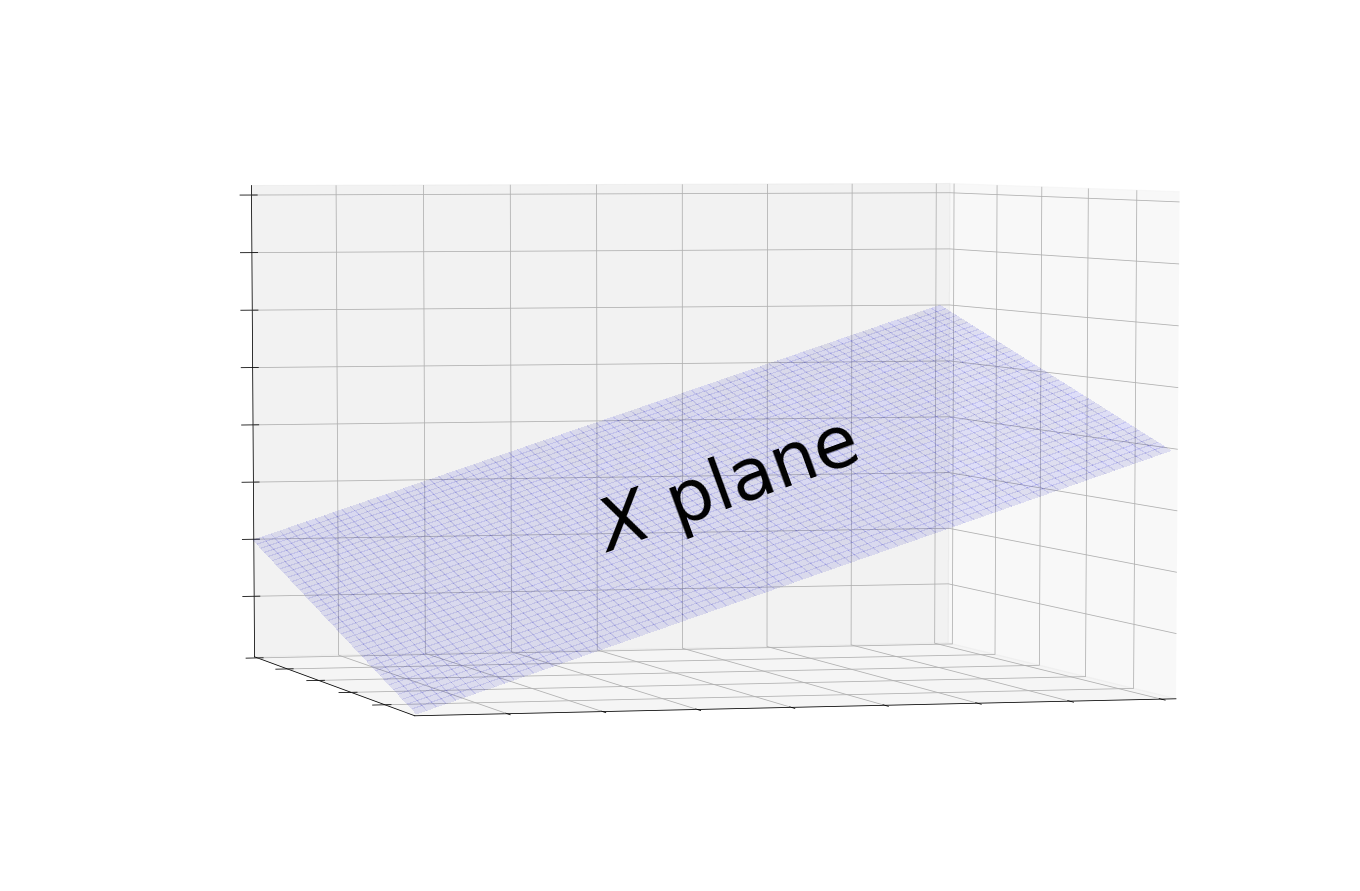

In [802]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

dd.ax.text(7, 5, 18, r"$X$ plane", (1, 1, 0), color='k', size=bigtext*2)
dd.fig.savefig(fname="img/xplane.png", pad_inches=0, bbox_inches='tight')

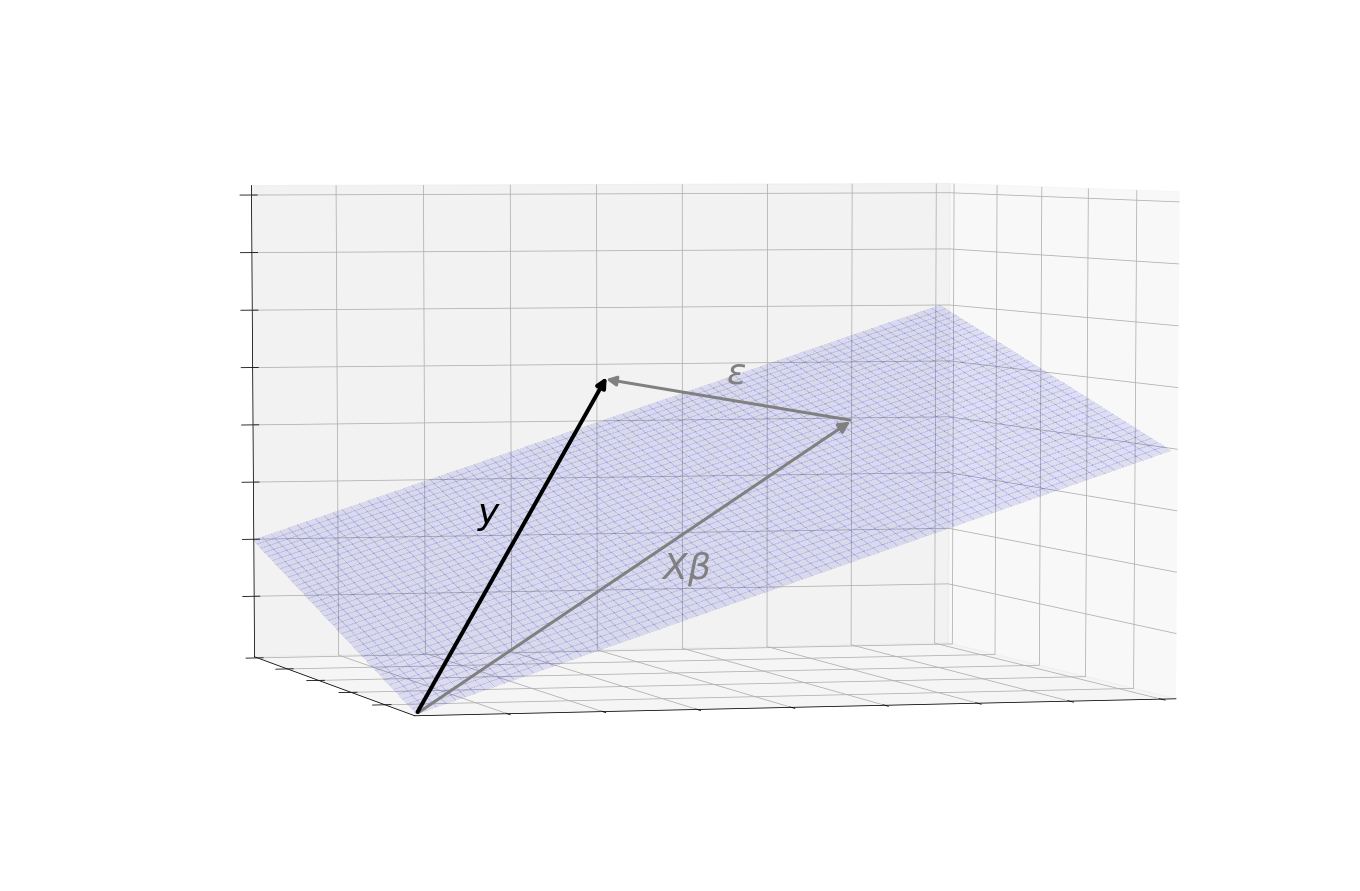

In [901]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

a = Arrow3D([0, 15], [0, 6], [0, 21], color='grey', mutation_scale=23)
dd.ax.text(8, 3, 9, r"$X\beta$", color='grey', size=bigtext)
dd.ax.add_artist(a)

b = Arrow3D([15, 7.5], [6, 5], [21, 25], color='grey')
dd.ax.text(12, 7, 24, r"$\epsilon$", color='grey', size=bigtext)
dd.ax.add_artist(b)

d = Arrow3D([0, 7.6], [0, 5], [0, 25.3], lw=4)
dd.ax.text(4, 5, 13, r"$y$", color='k', size=bigtext)
dd.ax.add_artist(d)
dd.fig.savefig(fname="img/yobserve.png", pad_inches=0, bbox_inches='tight')
plt.show()

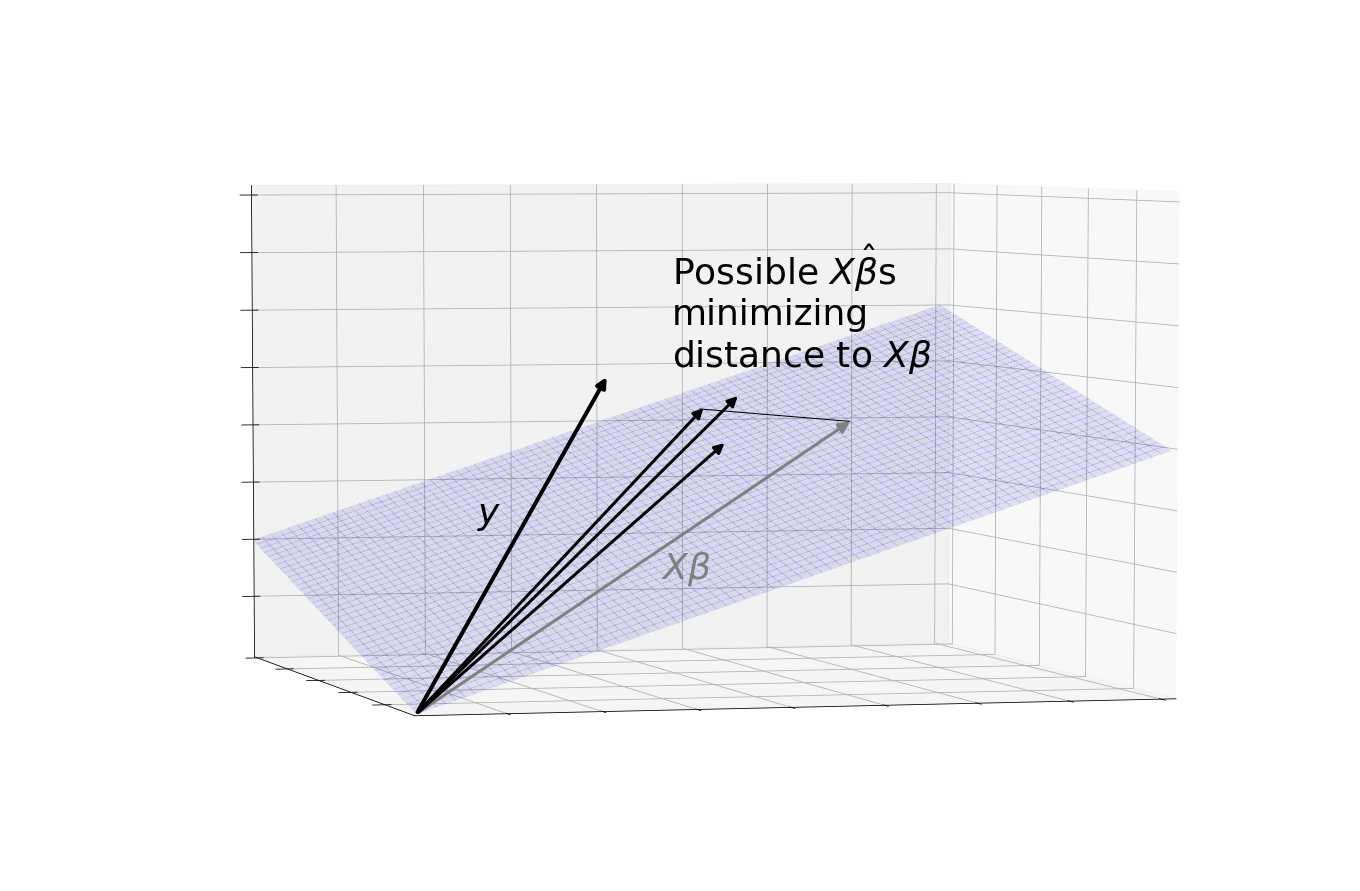

In [974]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

a = Arrow3D([0, 15], [0, 6], [0, 21], color='grey', mutation_scale=23)
dd.ax.text(8, 3, 9, r"$X\beta$", color='grey', size=bigtext)
dd.ax.add_artist(a)

a = Arrow3D([0, 12.5], [0, 9], [0, 21.5], color='k')
dd.ax.add_artist(a)
a = Arrow3D([0, 13.5], [0, 9], [0, 22.5], color='k')
dd.ax.add_artist(a)
a = Arrow3D([0, 12], [0, 7], [0, 19], color='k')
dd.ax.add_artist(a)
dd.ax.text(11, 8, 25, r"Possible $X\hat{\beta}$s" + "\nminimizing\n" + r"distance to $X\beta$", 
           color='k', size=bigtext)
a = Arrow3D([12.3, 15], [9, 6], [21.3, 20.9], color='k', lw=1, arrowstyle='-')
dd.ax.add_artist(a)

d = Arrow3D([0, 7.6], [0, 5], [0, 25.3], lw=4)
dd.ax.text(4, 5, 13, r"$y$", color='k', size=bigtext)
dd.ax.add_artist(d)
dd.fig.savefig(fname="img/bhats.png", pad_inches=0, bbox_inches='tight')
plt.show()

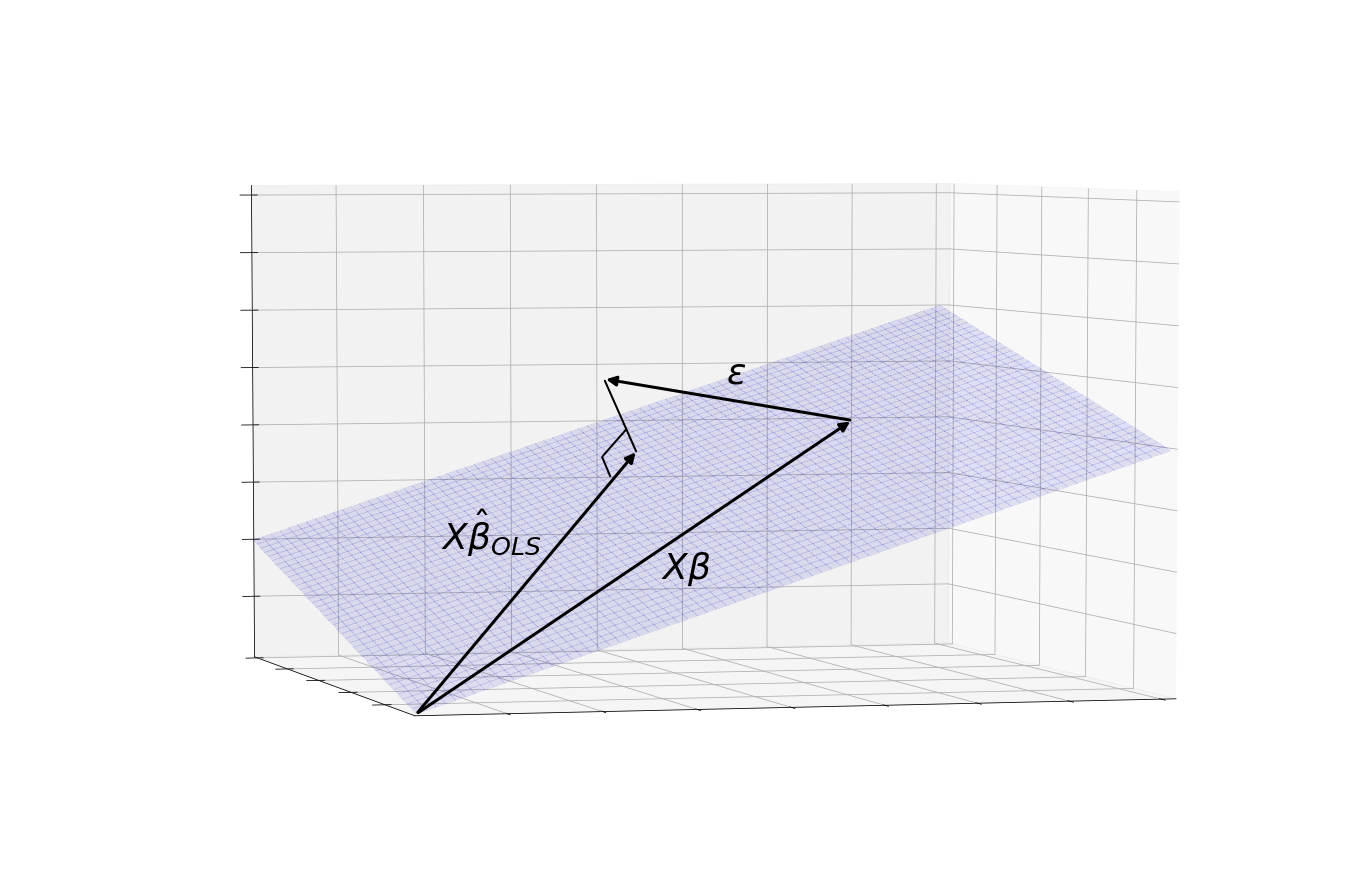

In [8]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

a = Arrow3D([0, 15], [0, 6], [0, 21])
dd.ax.text(8, 3, 9, r"$X\beta$", color='k', size=bigtext)
dd.ax.add_artist(a)

b = Arrow3D([15, 7.5], [6, 5], [21, 25])
dd.ax.text(12, 7, 24, r"$\epsilon$", color='k', size=bigtext)
dd.ax.add_artist(b)

c = Arrow3D([7.5, 10], [5, 8], [25, 17.8], lw=2, arrowstyle='-')
dd.ax.add_artist(c)

c = Arrow3D([8.1, 9.3], [6.3, 7.2], [18, 20.2], lw=2, arrowstyle='-')
dd.ax.add_artist(c)

c = Arrow3D([8.1, 8.0], [6.3, 5.6], [18.2, 16.5], lw=2, arrowstyle='-')
dd.ax.add_artist(c)

d = Arrow3D([0, 10], [0, 8], [0, 18])
dd.ax.text(3, 5, 11, r"$X\hat{\beta}_{OLS}$", color='k', size=bigtext)
dd.ax.add_artist(d)
dd.fig.savefig(fname="img/ols.png", pad_inches=0, bbox_inches='tight')
plt.show()

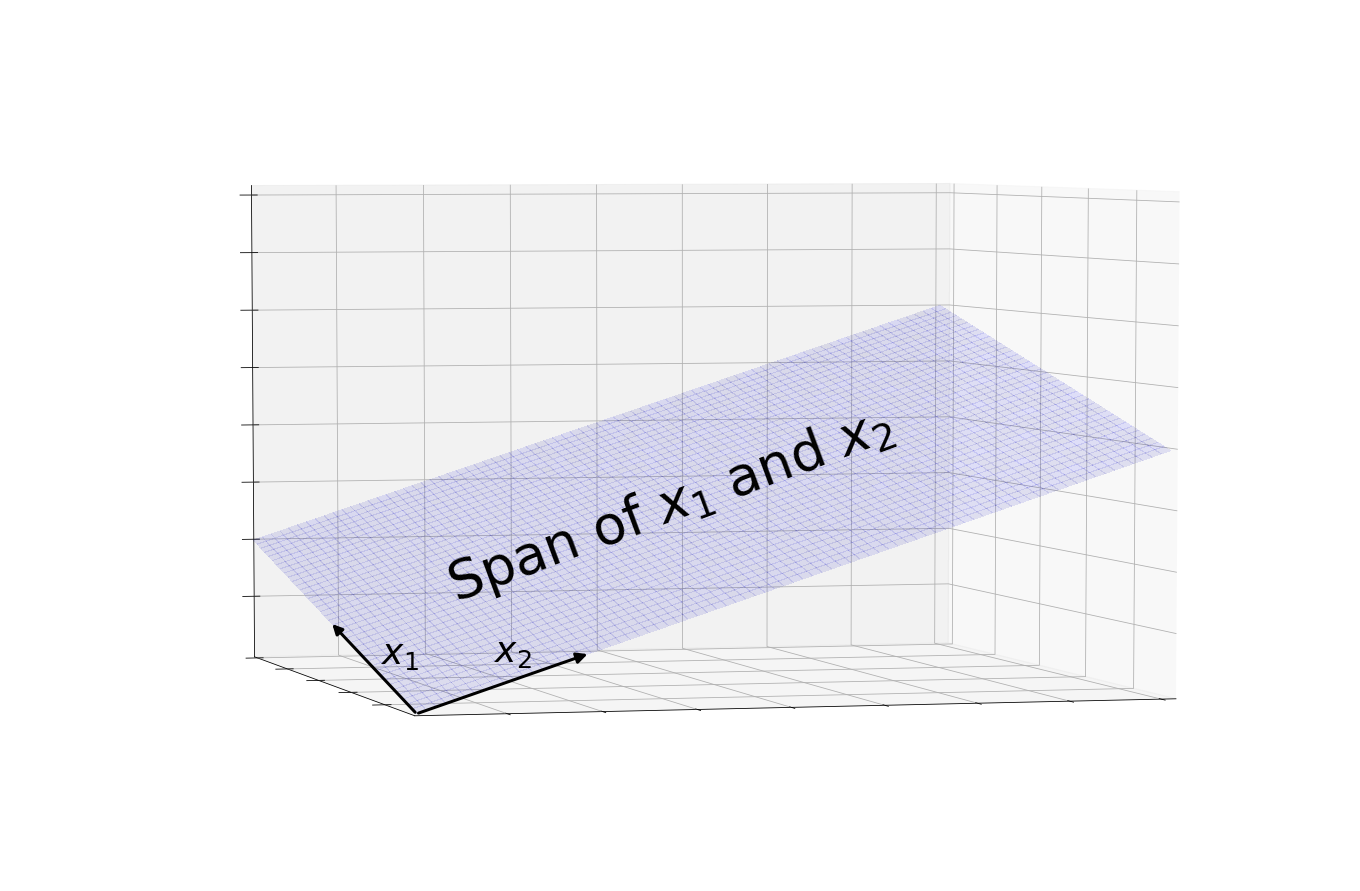

In [800]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

a = Arrow3D([0, 0], [0, 5], [0, 5], mutation_scale=20)
dd.ax.text(0, 2, 3, r"$x_1$", color='k', size=bigtext)
dd.ax.add_artist(a)

b = Arrow3D([0, 4.5], [0, 0], [0, 4.5], mutation_scale=22)
dd.ax.text(2, 0, 4, r"$x_2$", color='k', size=bigtext)
dd.ax.add_artist(b)

dd.ax.text(3, 5, 20, r"Span of $x_1$ and $x_2$", (1, 1.1, 0), color='k', size=bigtext*1.5)
dd.fig.savefig(fname="img/xspan.png", pad_inches=0, bbox_inches='tight')
plt.show()

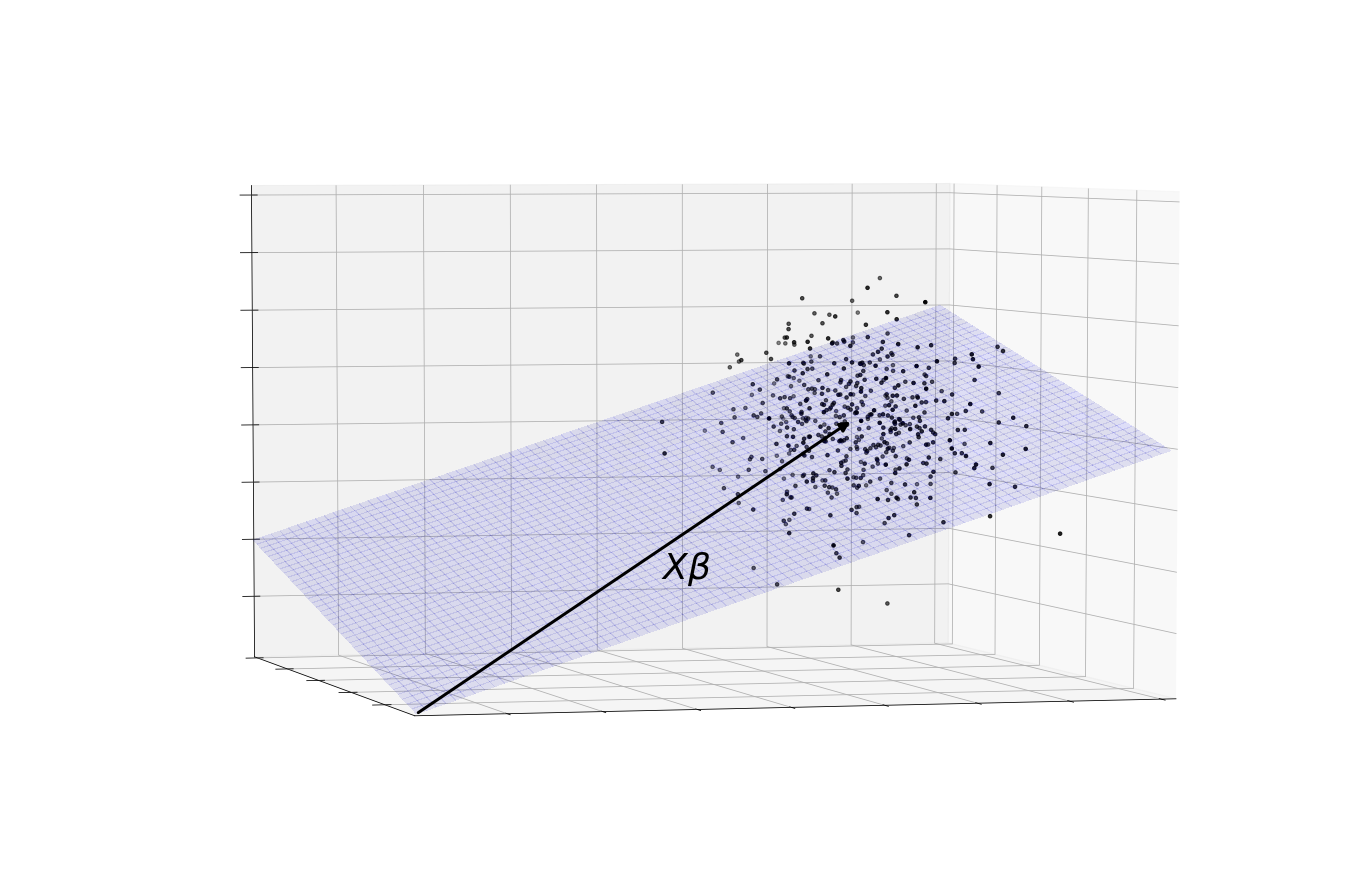

In [776]:
dd = Draw()
ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=20)
dd.ax.text(8, 3, 9, r"$X\beta$", color='k', size=bigtext)
dd.ax.add_artist(a)

from scipy import stats

sigma = 1.5
nx = np.random.normal(15, sigma, 500)
ny = np.random.normal(6, sigma, 500)
nz = np.random.normal(21, 3*sigma, 500)
nxyz = np.vstack([nx,ny,nz])
kde = stats.gaussian_kde(nxyz)
density = kde(nxyz)
dd.ax.scatter(nx, ny, nz, marker='.', color='k', s=50)
dd.fig.savefig(fname="img/cloud.png", pad_inches=0, bbox_inches='tight')
plt.show()

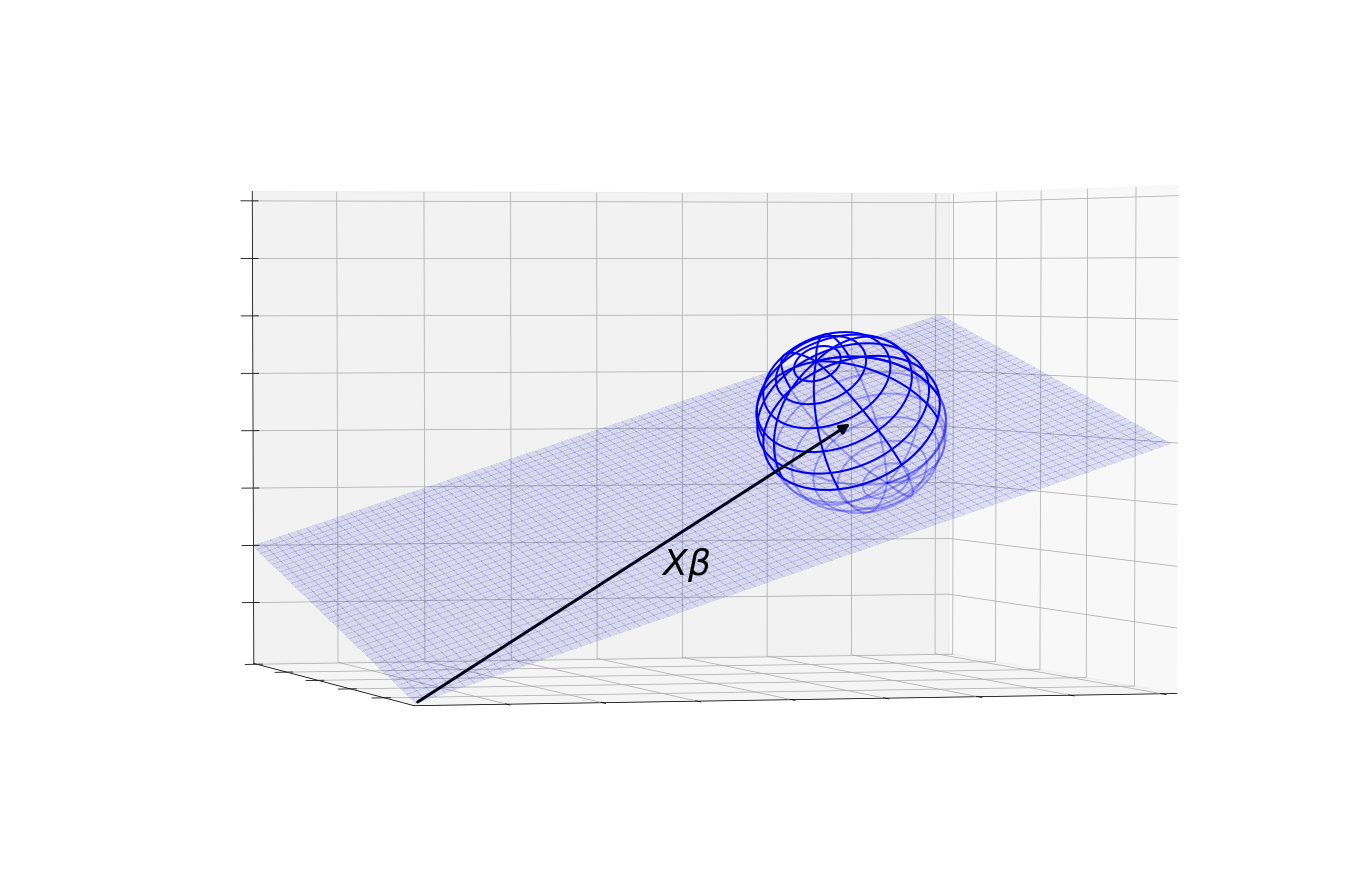

In [815]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False, zorder=0.5)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=20)
dd.ax.text(8, 3, 9, r"$X\beta$", color='k', size=bigtext)
dd.ax.add_artist(a)

'''b = Arrow3D([15, 9], [6, 7], [21, 26], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)
'''

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 16 elements
u=np.r_[0:2*np.pi:60j]
v=np.r_[0:0.5*np.pi:60j]
# x, y, and z are the coordinates of the points for plotting
# each is arranged in a 100x100 array
nx= np.outer(np.cos(u), np.sin(v))
ny= np.outer(np.sin(u), np.sin(v))
nz= np.outer(np.ones(np.size(u)), np.cos(v))
#toprot = np.array([[1,0,0], [0,1,0], [0,0,-1]])
toprot = np.array([[1,    0, -0.5],
                   [0,  0.5, -0.5],
                   [0.2,0.5, 0.5]])
botrot = np.array([[1,    0,  0.5], 
                   [0,  0.5,  0.5], 
                   [0.2,0.5, -0.5]])

txyz = np.matmul(toprot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
tx = 15 + 2.5 *   txyz[0].reshape(60,60)
ty =  6 + 0.8 *   txyz[1].reshape(60,60)
tz = 21 + 10.5 *   txyz[2].reshape(60,60)
dd.ax.plot_wireframe(tx, ty, tz, alpha=1, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=1)

bxyz = np.matmul(botrot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
bx = 15 + 2.5 *   bxyz[0].reshape(60,60)
by =  6 + 0.8 *  bxyz[1].reshape(60,60)
bz = 21 + 10.5 *   bxyz[2].reshape(60,60)
dd.ax.plot_wireframe(bx, by, bz, alpha=0.3, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=0)
dd.fig.savefig(fname="img/sphere.png", pad_inches=0, bbox_inches='tight')
plt.show()

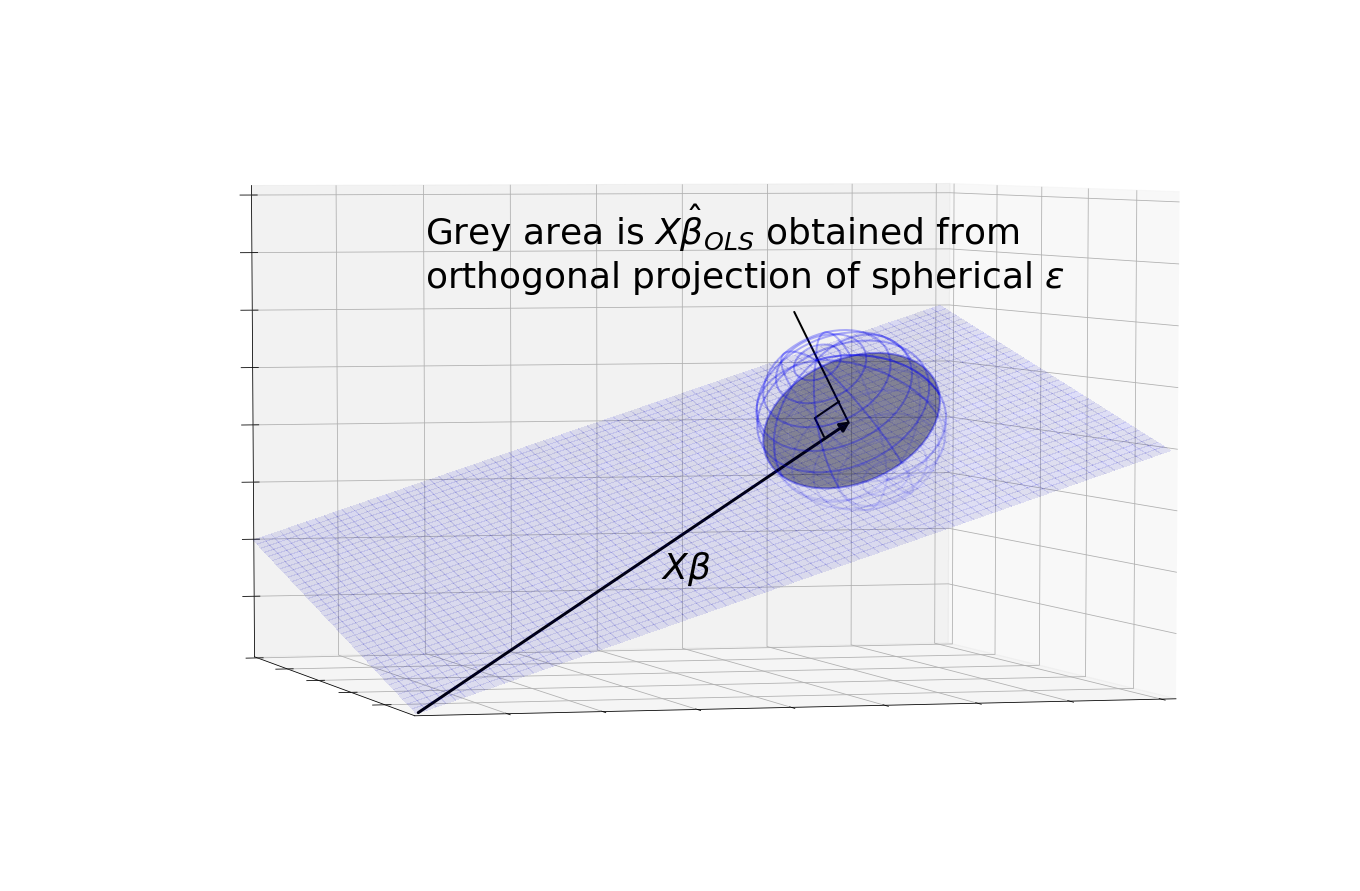

In [217]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False, zorder=0.5)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=20)
dd.ax.text(8, 3, 9, r"$X\beta$", color='k', size=bigtext)
dd.ax.add_artist(a)

'''b = Arrow3D([15, 9], [6, 7], [21, 26], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)
'''

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 16 elements
u=np.r_[0:2*np.pi:60j]
v=np.r_[0:0.5*np.pi:60j]
toprot = np.array([[1,    0, -0.5],
                   [0,  0.5, -0.5],
                   [0.2,0.5, 0.5]])
botrot = np.array([[1,    0,  0.5], 
                   [0,  0.5,  0.5], 
                   [0.2,0.5, -0.5]])

mx= np.outer(np.cos(u), np.sin(v))
my= np.outer(np.sin(u), np.sin(v))
mz= np.outer(np.zeros(np.size(u)), np.zeros(np.size(v)))
mxyz = np.matmul(toprot, np.vstack([mx.reshape(-1), my.reshape(-1), mz.reshape(-1)]))
sx = 15 + 2.5 *   mxyz[0].reshape(60,60)
sy =  6 + 0.8 *   mxyz[1].reshape(60,60)
sz = 21 + 10.5 *  mxyz[2].reshape(60,60)
dd.ax.plot_surface(sx, sy, sz, alpha=0.4, color='k', 
               rstride=7, cstride=10, linewidth=2, zorder=1)
dd.ax.text(4, 8, 32, r"Grey area is $X\hat{\beta}_{OLS}$ obtained from" + "\northogonal projection " + r"of spherical $\epsilon$",
           color='k', size=bigtext)

nx= np.outer(np.cos(u), np.sin(v))
ny= np.outer(np.sin(u), np.sin(v))
nz= np.outer(np.ones(np.size(u)), np.cos(v))
txyz = np.matmul(toprot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
tx = 15 + 2.5 *   txyz[0].reshape(60,60)
ty =  6 + 0.8 *   txyz[1].reshape(60,60)
tz = 21 + 10.5 *   txyz[2].reshape(60,60)
dd.ax.plot_wireframe(tx, ty, tz, alpha=0.3, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=1)

bxyz = np.matmul(botrot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
bx = 15 + 2.5 *   bxyz[0].reshape(60,60)
by =  6 + 0.8 *  bxyz[1].reshape(60,60)
bz = 21 + 10.5 *   bxyz[2].reshape(60,60)
dd.ax.plot_wireframe(bx, by, bz, alpha=0.1, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=0)

c = Arrow3D([11.6, 15], [3, 6.1], [31, 20.6], lw=2, arrowstyle='-')
dd.ax.add_artist(c) # back

c = Arrow3D([14.1, 15.4], [6.3, 7.2], [21.1, 22.4], lw=2, arrowstyle='-')
dd.ax.add_artist(c) # seat

c = Arrow3D([14.1, 14.0], [6.3, 5.6], [21.3, 19.6], lw=2, arrowstyle='-')
dd.ax.add_artist(c) # leg

dd.fig.savefig(fname="img/sphereols.png", pad_inches=0, bbox_inches='tight')
plt.show()

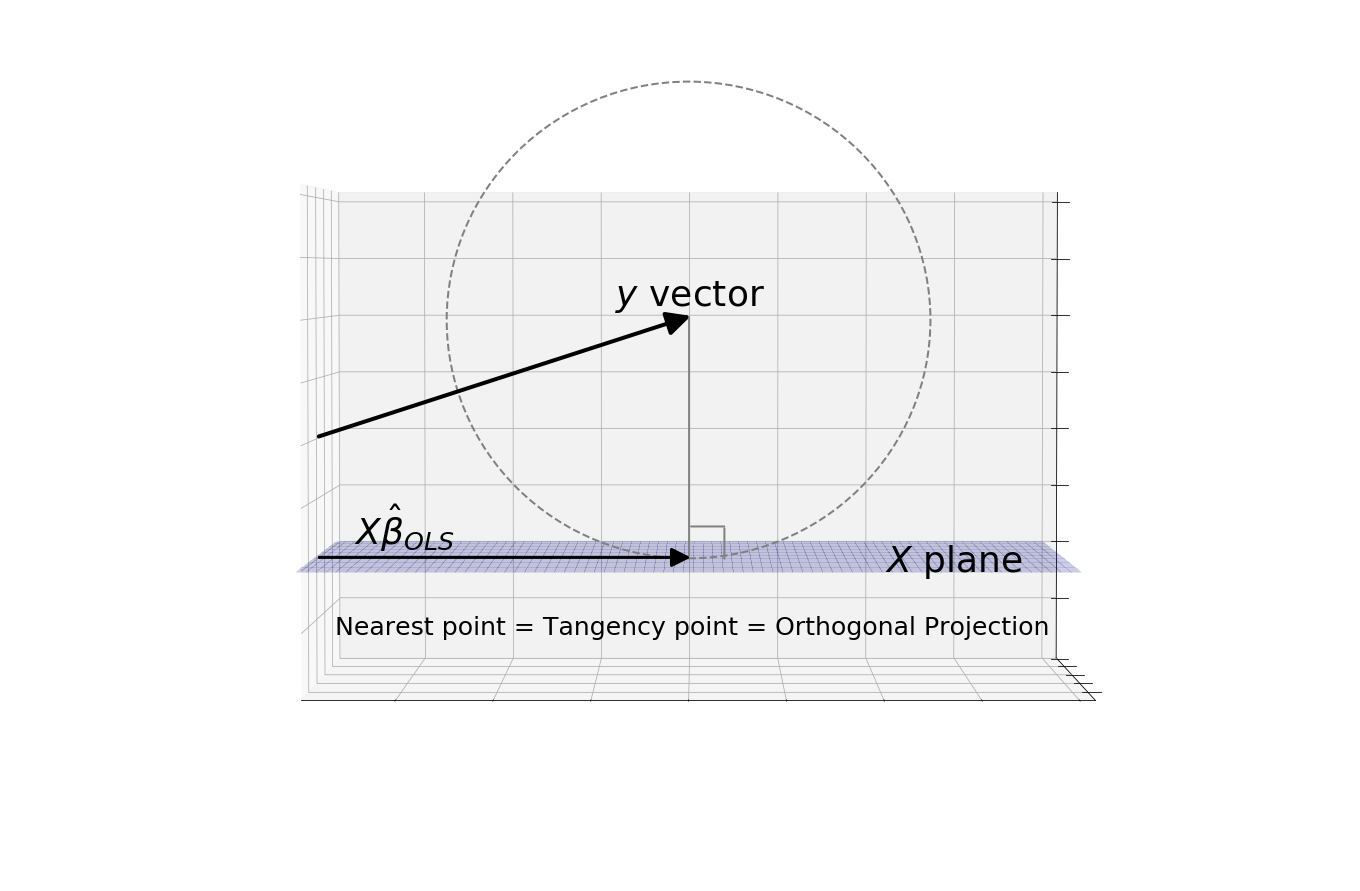

In [77]:
def g(x, y):
    return [10] * len(x)

gx = np.linspace(0, 20, 80)
gy = np.linspace(0, 10, 40)
gZ = np.ones((40, 80)) * 10

fig = plt.figure(figsize=myfigsize)
ax = plt.axes(projection='3d', elev=2, azim=270)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlim3d(0.5, 20)
ax.set_ylim3d(0.5, 10)
ax.set_zlim3d(0.5, 40)

ax.plot_surface(gX, gY, gZ, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False, zorder=0.5)
ax.text(15, 0, 10, r"$X$ plane", color='k', size=bigtext)

c = Arrow3D([0, 10.1], [5, 5], [20, 30.2], lw=4, arrowstyle='-|>', mutation_scale=50)
ax.add_artist(c)
ax.text(8, 5, 31, r"$y$ vector", color='k', size=bigtext)

c = Arrow3D([0, 10.1], [5, 5], [9.9, 9.9], lw=3, arrowstyle='-|>', mutation_scale=40)
ax.add_artist(c)
ax.text(1, 5, 11, r"$X\hat{\beta}_{OLS}$", color='k', size=bigtext)

c = Arrow3D([10, 10], [5, 5], [30.2, 9.9], lw=2, arrowstyle='-', color='grey')
ax.add_artist(c) #radius

c = Arrow3D([10.95, 10.95], [5.1, 5.1], [12.5, 9.6], lw=2, arrowstyle='-', color='grey')
ax.add_artist(c) #leg

c = Arrow3D([10, 11], [5, 5], [12.5, 12.5], lw=2, arrowstyle='-', color='grey')
ax.add_artist(c) #seat

p = Ellipse((10, 30), 12.3, 37.8, ec='grey', fc='none', linestyle="--", linewidth=2)
ax.add_patch(p)
art3d.pathpatch_2d_to_3d(p, z=0, zdir="y")

ax.text(1, 0, 5, r"Nearest point = Tangency point = Orthogonal Projection", color='k', size=0.7*bigtext)
fig.savefig(fname="img/tangent.png", pad_inches=0, bbox_inches='tight')

plt.show()

In [140]:
def rotation_matrix(d):
    """
    Calculates a rotation matrix given a vector d. The direction of d
    corresponds to the rotation axis. The length of d corresponds to 
    the sin of the angle of rotation.

    Variant of: http://mail.scipy.org/pipermail/numpy-discussion/2009-March/040806.html
    """
    sin_angle = np.linalg.norm(d)

    if sin_angle == 0:
        return np.identity(3)

    d /= sin_angle

    eye = np.eye(3)
    ddt = np.outer(d, d)
    skew = np.array([[    0,  d[2],  -d[1]],
                  [-d[2],     0,  d[0]],
                  [d[1], -d[0],    0]], dtype=np.float64)

    M = ddt + np.sqrt(1 - sin_angle**2) * (eye - ddt) + sin_angle * skew
    return M

def pathpatch_2d_to_3d(pathpatch, z = 0, normal = 'z'):
    """
    Transforms a 2D Patch to a 3D patch using the given normal vector.

    The patch is projected into they XY plane, rotated about the origin
    and finally translated by z.
    """
    if type(normal) is str: #Translate strings to normal vectors
        index = "xyz".index(normal)
        normal = np.roll((1.0,0,0), index)

    normal /= np.linalg.norm(normal) #Make sure the vector is normalised

    path = pathpatch.get_path() #Get the path and the associated transform
    trans = pathpatch.get_patch_transform()

    path = trans.transform_path(path) #Apply the transform

    pathpatch.__class__ = art3d.PathPatch3D #Change the class
    pathpatch._code3d = path.codes #Copy the codes
    pathpatch._facecolor3d = pathpatch.get_facecolor #Get the face color    

    verts = path.vertices #Get the vertices in 2D

    d = np.cross(normal, (0, 0, 1)) #Obtain the rotation vector    
    M = rotation_matrix(d) #Get the rotation matrix

    pathpatch._segment3d = np.array([np.dot(M, (x, y, 0)) + (0, 0, z) for x, y in verts])

def pathpatch_translate(pathpatch, delta):
    """
    Translates the 3D pathpatch by the amount delta.
    """
    pathpatch._segment3d += delta

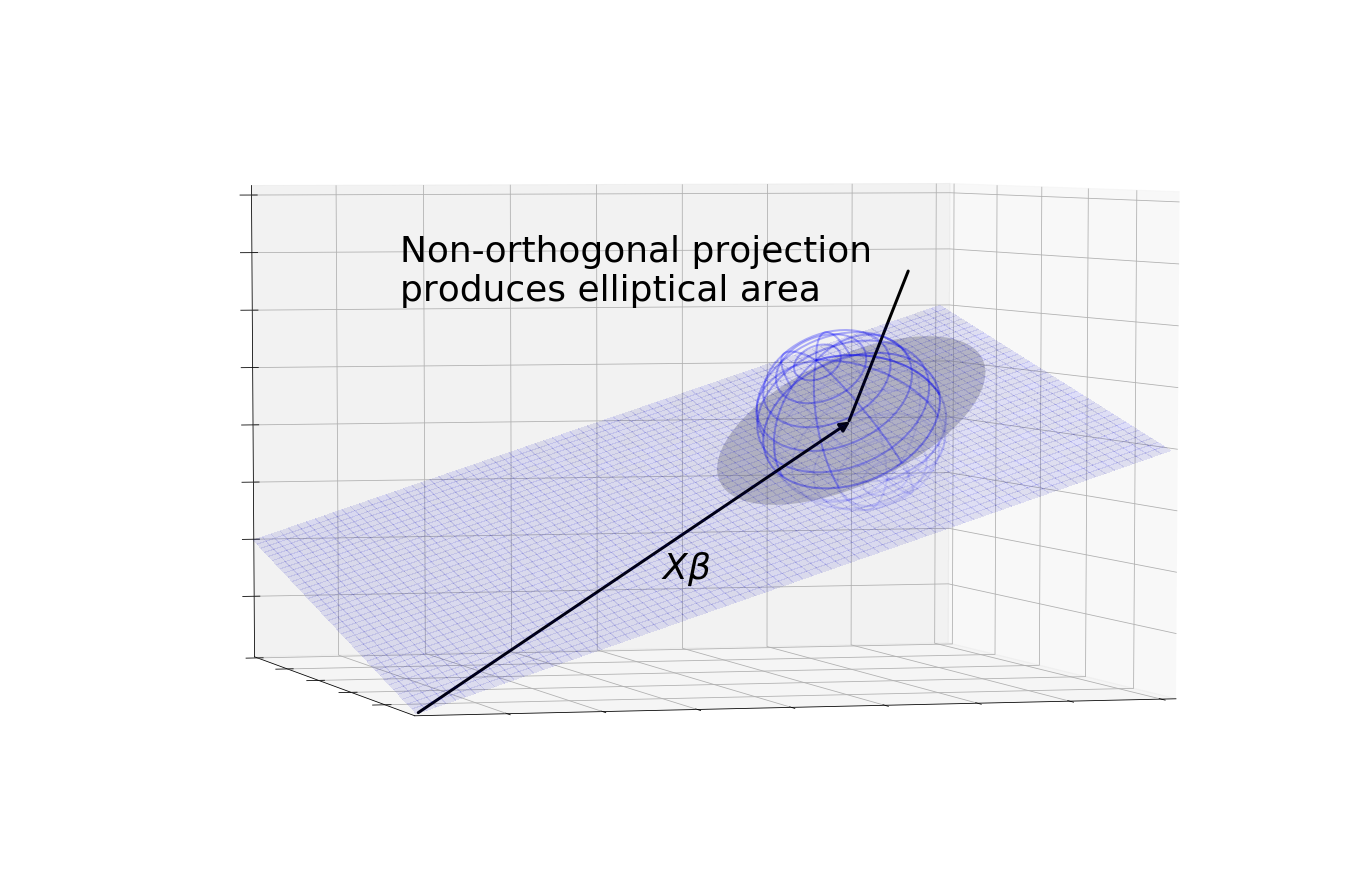

In [212]:
dd = Draw()
dd.ax.plot_surface(X, Y, Z, color='b', 
                alpha=0.1, linewidth=0, rstride=1, cstride=1, 
                antialiased=False, zorder=0.5)

a = Arrow3D([0, 15], [0, 6], [0, 21], mutation_scale=20)
dd.ax.text(8, 3, 9, r"$X\beta$", color='k', size=bigtext)
dd.ax.add_artist(a)

'''b = Arrow3D([15, 9], [6, 7], [21, 26], mutation_scale=12,
            lw=1, arrowstyle="-|>", color="k")
ax.text(12, 7, 24, r"$\epsilon$", color='k', size=14)
ax.add_artist(b)
'''

# u and v are parametric variables.
# u is an array from 0 to 2*pi, with 16 elements
u=np.r_[0:2*np.pi:60j]
v=np.r_[0:0.5*np.pi:60j]
toprot = np.array([[1,    0, -0.5],
                   [0,  0.5, -0.5],
                   [0.2,0.5, 0.5]])
botrot = np.array([[1,    0,  0.5], 
                   [0,  0.5,  0.5], 
                   [0.2,0.5, -0.5]])

p = Ellipse((0, 0), 6, 15, facecolor='grey', alpha=0.4, angle=20)
dd.ax.add_patch(p)
pathpatch_2d_to_3d(p, z = 0, normal = 'y')
pathpatch_translate(p, (15, 6, 21))

dd.ax.text(1, 3, 32, "Non-orthogonal projection\nproduces elliptical area",
           color='k', size=bigtext)
c = Arrow3D([16, 14.9], [5, 6], [34, 20.8], lw=3, arrowstyle='-', color='k')
dd.ax.add_artist(c) #seat

# sphere
nx= np.outer(np.cos(u), np.sin(v))
ny= np.outer(np.sin(u), np.sin(v))
nz= np.outer(np.ones(np.size(u)), np.cos(v))
txyz = np.matmul(toprot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
tx = 15 + 2.5 *   txyz[0].reshape(60,60)
ty =  6 + 0.8 *   txyz[1].reshape(60,60)
tz = 21 + 10.5 *   txyz[2].reshape(60,60)
dd.ax.plot_wireframe(tx, ty, tz, alpha=0.3, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=1)

bxyz = np.matmul(botrot, np.vstack([nx.reshape(-1), ny.reshape(-1), nz.reshape(-1)]))
bx = 15 + 2.5 *   bxyz[0].reshape(60,60)
by =  6 + 0.8 *  bxyz[1].reshape(60,60)
bz = 21 + 10.5 *   bxyz[2].reshape(60,60)
dd.ax.plot_wireframe(bx, by, bz, alpha=0.1, color='b', 
               rstride=7, cstride=10, linewidth=2, zorder=0)


dd.fig.savefig(fname="img/badprojection.png", pad_inches=0, bbox_inches='tight')
plt.show()

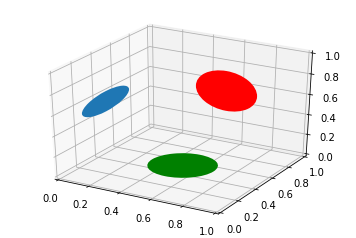